In [3]:
%matplotlib inline
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy as sp
from scipy import stats

In [5]:
Company_Data = pd.read_excel('COMPANY_DATA.xlsx')   # need to remove the password before unload the file
Company_Data.head()

,state_county_fips,id,weight1,col1,col3,col4,col5,col6,col7,col8,...,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28
0,1001,0,22,15.58,1.82,12.47,20.199,83770.04,21.25,25.49,...,1.17,0.83,20.199,23534.09,0.61,0.61,9.243,12810.16,0.10,0.10
1,1001,1,125,15.58,13.54,13.57,111.467,510522.29,22.88,25.76,...,1.05,0.95,44.548,51904.70,0.23,0.22,59.035,62194.05,0.35,0.24
2,1001,2,70,15.58,0.00,10.55,66.699,335401.27,11.15,13.45,...,0.58,0.56,24.840,28941.57,0.26,0.15,32.917,45623.42,0.46,0.29
3,1001,3,46,15.58,6.05,9.77,39.944,218625.25,16.18,20.25,...,1.17,0.92,34.205,39854.46,0.65,0.53,11.572,16038.28,0.31,0.15
4,1001,4,7,15.58,0.98,9.72,6.027,20930.97,11.00,15.94,...,1.40,0.83,0.385,448.52,0.31,0.16,3.089,4281.74,0.18,0.14


In [37]:
CENSUS_Data = pd.read_excel('CENSUS_DATA.xls', skiprows=[0,1,2])   
CENSUS_Data.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8
0,0,0,US,United States,46153077,45878016,46428138,14.7,14.6,14.8,...,19.7,55775,55690,55860,4448211,4397105,4499317,22.8,22.5,23.1
1,1,0,AL,Alabama,875853,859781,891925,18.5,18.2,18.8,...,26.1,44833,44110,45556,84382,80530,88234,29.4,28.1,30.7
2,1,1,AL,Autauga County,6966,5673,8259,12.7,10.3,15.1,...,22.1,56580,51459,61701,.,.,.,.,.,.
3,1,3,AL,Baldwin County,25941,21665,30217,12.9,10.8,15,...,22,52387,49865,54909,.,.,.,.,.,.
4,1,5,AL,Barbour County,7380,6240,8520,32,27.1,36.9,...,51.7,31433,28622,34244,.,.,.,.,.,.


In [6]:
HEALTH_Data = pd.ExcelFile('HEALTH_DATA.xls')   
H_OFR= HEALTH_Data.parse('Outcomes & Factors Rankings')   # HealthData excel ,Outcomes Factors Rankings sheet
H_OFS= HEALTH_Data.parse('Outcomes & Factors SubRankings')   # HealthData excel ,Outcomes & Factors SubRankings
H_RMD= HEALTH_Data.parse('Ranked Measure Data')   # HealthData excel ,Ranked Measure Data
H_RMSY= HEALTH_Data.parse('Ranked Measure Sources & Years')   # HealthData excel ,Ranked Measure Sources & Years
H_AMD= HEALTH_Data.parse('Additional Measure Data')   # HealthData excel ,Additional Measure Data
H_AMSY= HEALTH_Data.parse('Addtl Measure Sources & Years')   # HealthData excel ,Addtl Measure Sources & Years

#print "H_OFR", H_OFR.head()
#print 'H_OFS', H_OFS.head()
#print 'H_RMD', H_RMD.head()
#print "H_RMSY", H_RMSY.head()  # below this one not parsing to use
#print "H_AMD", H_AMD.head()
#print "H_AMSY", H_AMSY.head()

#H_OFR.head()
#H_OFS.head()
#H_RMD.head()
#H_RMSY.head()
#H_AMD.head()
#H_AMSY.head()

In [7]:
#Parsing H_OFR
H_OFR= HEALTH_Data.parse('Outcomes & Factors Rankings', header=[0,1])   # HealthData excel ,Outcomes Factors Rankings sheet

H_OFR.rename(columns={'Unnamed: 0_level_0':'State'}, inplace=True)   # rename column name
H_OFR.rename(columns={'Unnamed: 1_level_0':'County'}, inplace=True)   # rename column name
H_OFR.rename(columns={'Unnamed: 2_level_0':'Ranked'}, inplace=True)   # rename column name
H_OFR.head()


State   County               Ranked Health Outcomes           \
FIPS    State   County # of Ranked Counties            Rank Quartile   
1001  Alabama  Autauga                   67               8        1   
1003  Alabama  Baldwin                   67               2        1   
1005  Alabama  Barbour                   67              27        2   
1007  Alabama     Bibb                   67              48        3   
1009  Alabama   Blount                   67              11        1   

     Health Factors           
FIPS           Rank Quartile  
1001              3        1  
1003              4        1  
1005             60        4  
1007             37        3  
1009             21        2

In [8]:
#Parsing H_OFS
H_OFS= HEALTH_Data.parse('Outcomes & Factors SubRankings', header=[0,1])

H_OFS.rename(columns=({'Unnamed: 0_level_0':'State'}), inplace=True)  # rename column name
H_OFS.rename(columns=({'Unnamed: 1_level_0':'County'}), inplace=True)  # rename column name
H_OFS.rename(columns=({'Unnamed: 2_level_0':'Ranked'}), inplace=True)  # rename column name

H_OFS.head()

State   County               Ranked Length of Life           \
FIPS    State   County # of Ranked Counties           Rank Quartile   
1001  Alabama  Autauga                   67             17        1   
1003  Alabama  Baldwin                   67              3        1   
1005  Alabama  Barbour                   67             12        1   
1007  Alabama     Bibb                   67             51        4   
1009  Alabama   Blount                   67             18        2   

     Quality of Life          Health Behaviors          Clinical Care  \
FIPS            Rank Quartile             Rank Quartile          Rank   
1001               7        1                6        1            10   
1003               2        1                3        1            13   
1005              50        3               62        4            27   
1007              37        3               48        3            35   
1009              10        1               25        2            45   

              Social & Economic Factors          Physical Environment           
FIPS Quartile                      Rank Quartile                 Rank Quartile  
1001        1                         3        1                   49        3  
1003        1                         8        1                   43        3  
1005        2                        60        4                   55        4  
1007        3                        33        2                   19        2  
1009        3                        13        1                   48        3

In [9]:
#Parsing H_RMD
H_RMD= HEALTH_Data.parse('Ranked Measure Data', header=[0,1])

H_RMD.rename(columns=({'*Due to data limitations, data for Jasper and Newton counties in Missouri were \
averaged for primary care physicians':'Location'}), inplace=True)  # rename column name

H_RMD.head()

*Due to data limitations, data for Jasper and Newton counties in Missouri were averaged for primary care physicians Location  \
FIPS                                                                                                                   State   
1001                                                                                                                 Alabama   
1003                                                                                                                 Alabama   
1005                                                                                                                 Alabama   
1007                                                                                                                 Alabama   
1009                                                                                                                 Alabama   

*Due to data limitations, data for Jasper and Newton counties in Missouri were averaged for primary care physicians           \
FIPS                                                                                                                  County   
1001                                                                                                                 Autauga   
1003                                                                                                                 Baldwin   
1005                                                                                                                 Barbour   
1007                                                                                                                    Bibb   
1009                                                                                                                  Blount   

*Due to data limitations, data for Jasper and Newton counties in Missouri were averaged for primary care physicians Premature death  \
FIPS                                                                                                                       # Deaths   
1001                                                                                                                          830.0   
1003                                                                                                                         2573.0   
1005                                                                                                                          413.0   
1007                                                                                                                          407.0   
1009                                                                                                                          906.0   

*Due to data limitations, data for Jasper and Newton counties in Missouri were averaged for primary care physicians                                    \
FIPS                                                                                                                Years of Potential Life Lost Rate   
1001                                                                                                                                           9158.2   
1003                                                                                                                                           7393.9   
1005                                                                                                                                           8573.1   
1007                                                                                                                                          11766.1   
1009                                                                                                                                           9332.8   

*Due to data limitations, data for Jasper and Newton counties in Missouri were averaged for primary care physicians               \
FIPS                                                    

Calculation:
above this is loading data and parsing input tables

In [10]:
#Company_Data Alabama(AL)
Company_AL=Company_Data[Company_Data["state_county_fips"]<2000]
Company_AL_Group=Company_AL.groupby('state_county_fips')
Company_AL_Group['weight1'].mean().sort_values()
AL_Counties=DataFrame(Company_AL_Group['weight1'].mean().sort_values())
AL_Counties['Rank_weight']=Company_AL_Group['weight1'].mean().sort_values().rank()
AL_Counties.head()

,weight1,Rank_weight
state_county_fips,,
1037,8.000000,1.0
1063,12.000000,2.0
1131,14.166667,3.0
1129,15.500000,4.0
1105,18.000000,5.0


In [168]:
#join AL comapny data and health data
H_OFR.head()
AL_Counties=AL_Counties.join(H_OFR, how='left')

In [229]:
AL_Counties['Name']=AL_Counties[('County','County')]

AL_Counties.head()


,weight1,Rank_weight,"(State, State)","(County, County)","(Ranked, # of Ranked Counties)","(Health Outcomes, Rank)","(Health Outcomes, Quartile)","(Health Factors, Rank)","(Health Factors, Quartile)",Name
state_county_fips,,,,,,,,,,
1037,8.000000,1.0,Alabama,Coosa,67,28,2,45,3,Coosa
1063,12.000000,2.0,Alabama,Greene,67,66,4,66,4,Greene
1131,14.166667,3.0,Alabama,Wilcox,67,67,4,67,4,Wilcox
1129,15.500000,4.0,Alabama,Washington,67,29,2,48,3,Washington
1105,18.000000,5.0,Alabama,Perry,67,65,4,61,4,Perry


In [38]:
AL_CENSUS=CENSUS_Data[(CENSUS_Data['Postal Code']=="AL") & (CENSUS_Data['County FIPS Code'] != 0)]
AL_CENSUS['Name']=AL_CENSUS['Name'].map(lambda x: x.rstrip(' County'))
# RANK Poverty percent 
AL_CENSUS['Poverty Percent, Rank']=AL_CENSUS['Poverty Percent, All Ages'].rank()
AL_CENSUS.head()

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,...,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8,"Poverty Percent, Rank"
2,1,1,AL,Autauga,6966,5673,8259,12.7,10.3,15.1,...,56580,51459,61701,.,.,.,.,.,.,3.0
3,1,3,AL,Baldwi,25941,21665,30217,12.9,10.8,15,...,52387,49865,54909,.,.,.,.,.,.,4.0
4,1,5,AL,Barbour,7380,6240,8520,32,27.1,36.9,...,31433,28622,34244,.,.,.,.,.,.,59.0
5,1,7,AL,Bibb,4516,3584,5448,22.2,17.6,26.8,...,40767,36640,44894,.,.,.,.,.,.,40.5
6,1,9,AL,Bl,8399,6798,10000,14.7,11.9,17.5,...,50487,46838,54136,.,.,.,.,.,.,8.0


In [12]:
#join AL comapny data and H_OFS health data
H_OFR.head()
AL_Counties_H_OFS=AL_Counties.join(H_OFS, how='left')
AL_Counties_H_OFS.head()

/opt/conda/lib/python2.7/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,weight1,Rank_weight,"(State, State)","(County, County)","(Ranked, # of Ranked Counties)","(Length of Life, Rank)","(Length of Life, Quartile)","(Quality of Life, Rank)","(Quality of Life, Quartile)","(Health Behaviors, Rank)","(Health Behaviors, Quartile)","(Clinical Care, Rank)","(Clinical Care, Quartile)","(Social & Economic Factors, Rank)","(Social & Economic Factors, Quartile)","(Physical Environment, Rank)","(Physical Environment, Quartile)"
state_county_fips,,,,,,,,,,,,,,,,,
1037,8.000000,1.0,Alabama,Coosa,67,9,1,52,4,45,3,25,2,50,3,31,2
1063,12.000000,2.0,Alabama,Greene,67,58,4,67,4,67,4,52,4,65,4,8,1
1131,14.166667,3.0,Alabama,Wilcox,67,67,4,66,4,66,4,50,3,67,4,52,4
1129,15.500000,4.0,Alabama,Washington,67,35,3,29,2,29,2,61,4,51,4,13,1
1105,18.000000,5.0,Alabama,Perry,67,65,4,60,4,59,4,51,4,61,4,37,3


VISUALIZATION
from here is focussed on visualization all calculation is above this point

In [264]:
AL_Counties.head()
AL_CENSUS.head()

AL_poverty_percent=list(AL_CENSUS['Poverty Percent, Rank'])
#AL_CENSUS
AL_health_factor_rank=list(AL_Counties.sort_index()[('Health Factors', 'Rank')])
#health_factor_rank
AL_JUST_score_rank=list(AL_Counties.sort_index()['Rank_weight'])
#AL_JUST_score_rank
type(AL_poverty_percent)

list

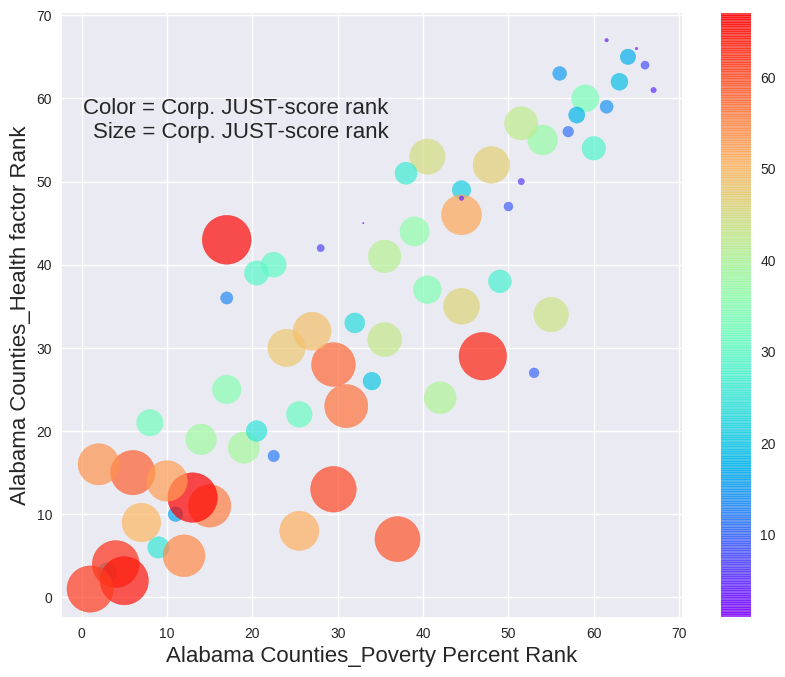

In [344]:
#Figure 1
# Bubble plot , http://matplotlib.org/1.4.3/examples/shapes_and_collections/scatter_demo.html
fig = plt.figure(facecolor='w')
plt.figure(figsize=(10,8), dpi=100)
x=AL_poverty_percent
y=AL_health_factor_rank
area=[x1**1.7 for x1 in AL_JUST_score_rank]     
colors = np.random.rand(67)
cm = plt.cm.get_cmap('rainbow')  # plt.cm.coolwarm

plt.scatter(x, y, s=area, c=AL_JUST_score_rank, alpha=0.7 , cmap=cm)    #  , c=colors
#fig.suptitle('Alabama', fontsize=18)
plt.xlabel('Alabama Counties_Poverty Percent Rank', fontsize=16)
plt.ylabel('Alabama Counties_Health Factor Rank', fontsize=16)
plt.colorbar()
facecolor=fig.get_facecolor()
edgecolor='red'
plt.text(1, 2.5, "Color = Corp. JUST-score rank\nSize = Corp. JUST-score rank",
        transform=ax.transAxes,
        horizontalalignment='right',
        verticalalignment='top',
        size=16)
fig.savefig('Alabama-Compar.png')


In [ ]:
#TABLE Alabama

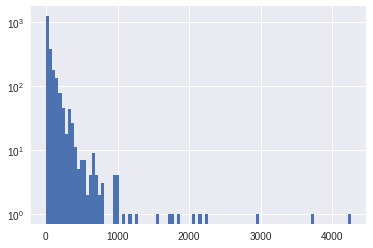

In [194]:


fig, ax = plt.subplots()
Company_Data["weight1"][Company_Data["state_county_fips"]<2000].hist(ax=ax, bins=100)
ax.set_yscale('log')



In [21]:
AL_Counties_H_OFS.head()

,weight1,Rank_weight,"(State, State)","(County, County)","(Ranked, # of Ranked Counties)","(Length of Life, Rank)","(Length of Life, Quartile)","(Quality of Life, Rank)","(Quality of Life, Quartile)","(Health Behaviors, Rank)","(Health Behaviors, Quartile)","(Clinical Care, Rank)","(Clinical Care, Quartile)","(Social & Economic Factors, Rank)","(Social & Economic Factors, Quartile)","(Physical Environment, Rank)","(Physical Environment, Quartile)"
state_county_fips,,,,,,,,,,,,,,,,,
1037,8.000000,1.0,Alabama,Coosa,67,9,1,52,4,45,3,25,2,50,3,31,2
1063,12.000000,2.0,Alabama,Greene,67,58,4,67,4,67,4,52,4,65,4,8,1
1131,14.166667,3.0,Alabama,Wilcox,67,67,4,66,4,66,4,50,3,67,4,52,4
1129,15.500000,4.0,Alabama,Washington,67,35,3,29,2,29,2,61,4,51,4,13,1
1105,18.000000,5.0,Alabama,Perry,67,65,4,60,4,59,4,51,4,61,4,37,3


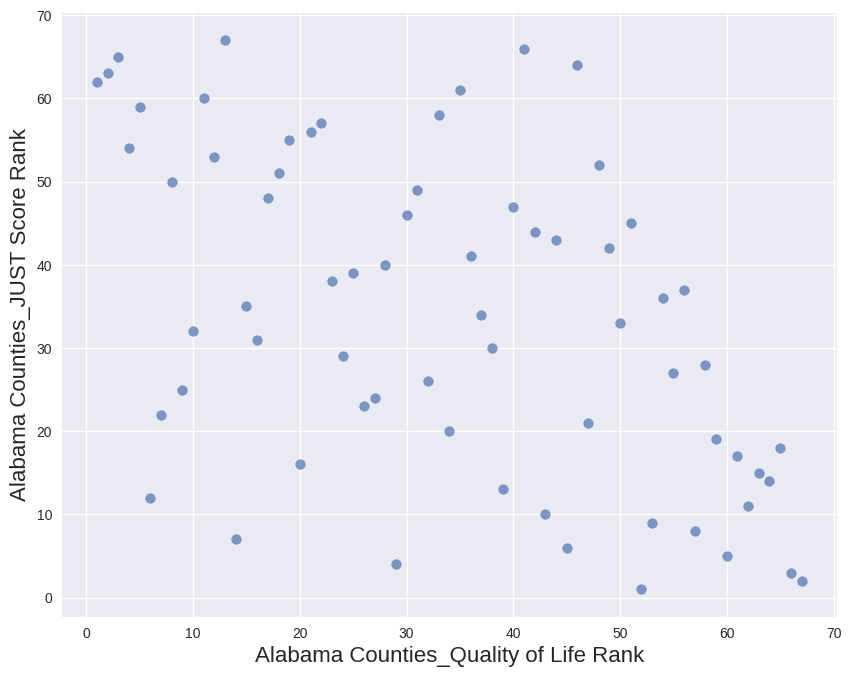

In [30]:
#Figure 2
AL_JUST_score_rank1=list(AL_Counties_H_OFS['Rank_weight'])

fig = plt.figure(facecolor='w')
plt.figure(figsize=(10,8), dpi=100)
x=list(AL_Counties_H_OFS[('Quality of Life', 'Rank')])
y=AL_JUST_score_rank1

plt.scatter(x, y, alpha=0.7)    
plt.xlabel('Alabama Counties_Quality of Life Rank', fontsize=16)
plt.ylabel('Alabama Counties_JUST Score Rank', fontsize=16)


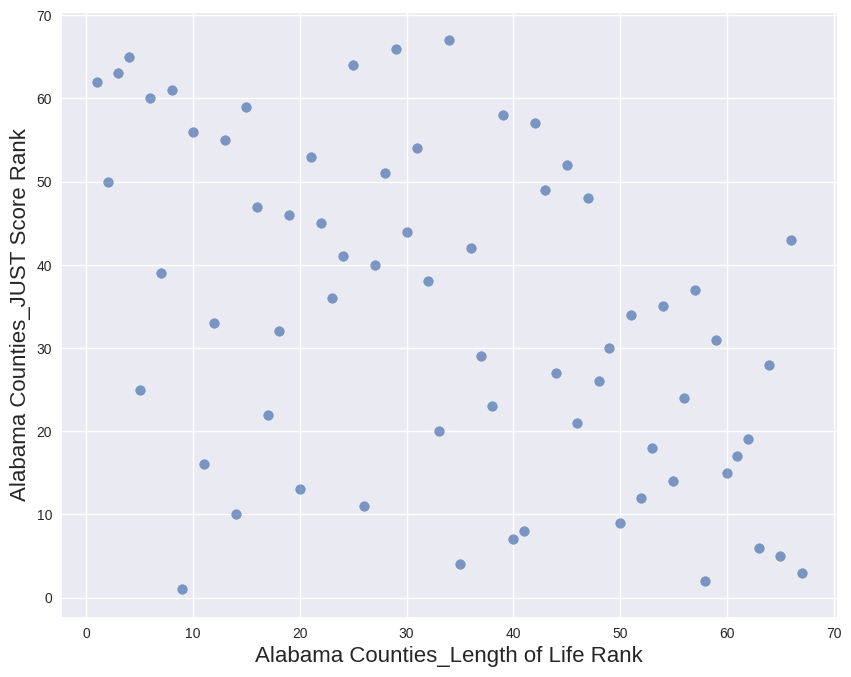

In [26]:
#Figure 3
AL_JUST_score_rank1=list(AL_Counties_H_OFS['Rank_weight'])

fig = plt.figure(facecolor='w')
plt.figure(figsize=(10,8), dpi=100)
x=list(AL_Counties_H_OFS[('Length of Life', 'Rank')])
y=AL_JUST_score_rank1

plt.scatter(x, y, alpha=0.7)    
plt.xlabel('Alabama Counties_Length of Life Rank', fontsize=16)
plt.ylabel('Alabama Counties_JUST Score Rank', fontsize=16)


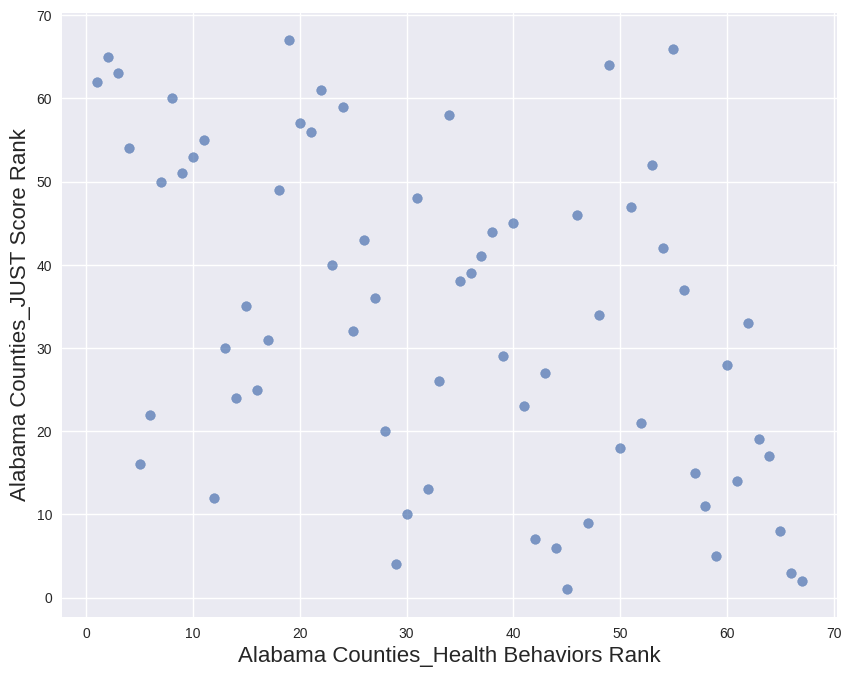

In [31]:
#Figure 4
AL_JUST_score_rank1=list(AL_Counties_H_OFS['Rank_weight'])

fig = plt.figure(facecolor='w')
plt.figure(figsize=(10,8), dpi=100)
x=list(AL_Counties_H_OFS[('Health Behaviors', 'Rank')])
y=AL_JUST_score_rank1

plt.scatter(x, y, alpha=0.7)    
plt.xlabel('Alabama Counties_Health Behaviors Rank', fontsize=16)
plt.ylabel('Alabama Counties_JUST Score Rank', fontsize=16)

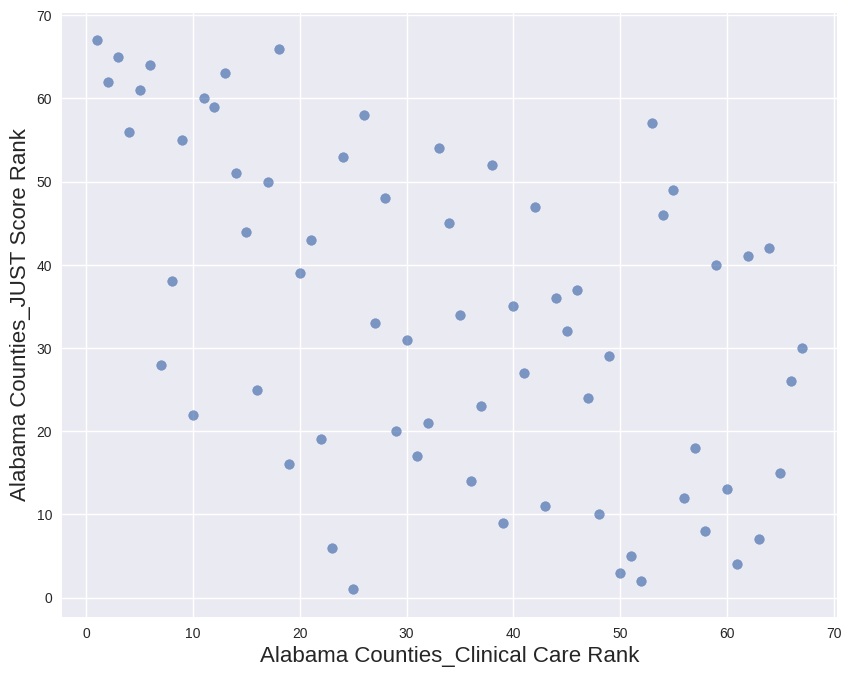

In [34]:
#Figure 5
AL_JUST_score_rank1=list(AL_Counties_H_OFS['Rank_weight'])

fig = plt.figure(facecolor='w')
plt.figure(figsize=(10,8), dpi=100)
x=list(AL_Counties_H_OFS[('Clinical Care', 'Rank')])
y=AL_JUST_score_rank1

plt.scatter(x, y, alpha=0.7)    
plt.xlabel('Alabama Counties_Clinical Care Rank', fontsize=16)
plt.ylabel('Alabama Counties_JUST Score Rank', fontsize=16)

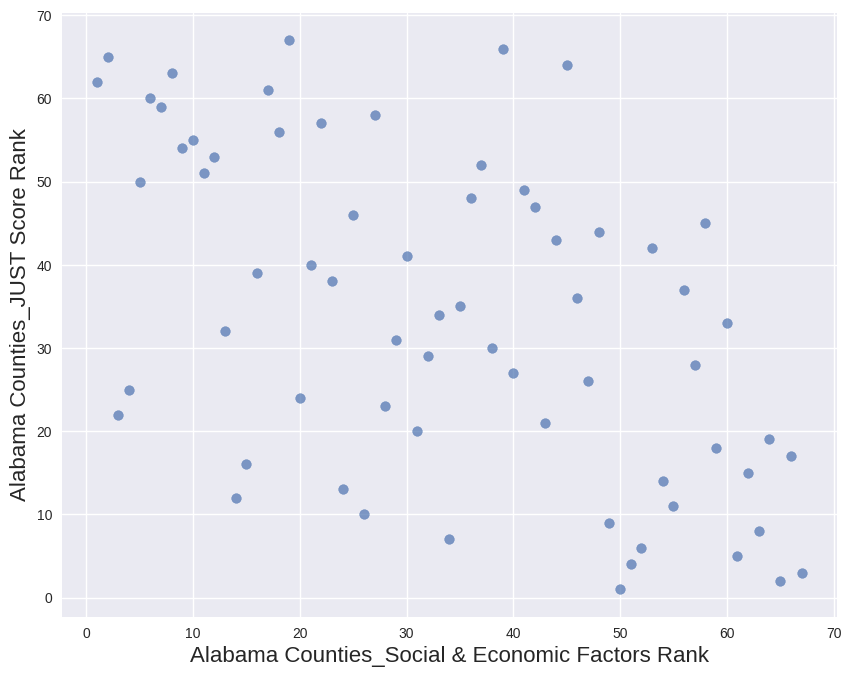

In [33]:
#Figure 6
AL_JUST_score_rank1=list(AL_Counties_H_OFS['Rank_weight'])

fig = plt.figure(facecolor='w')
plt.figure(figsize=(10,8), dpi=100)
x=list(AL_Counties_H_OFS[('Social & Economic Factors', 'Rank')])
y=AL_JUST_score_rank1

plt.scatter(x, y, alpha=0.7)    
plt.xlabel('Alabama Counties_Social & Economic Factors Rank', fontsize=16)
plt.ylabel('Alabama Counties_JUST Score Rank', fontsize=16)

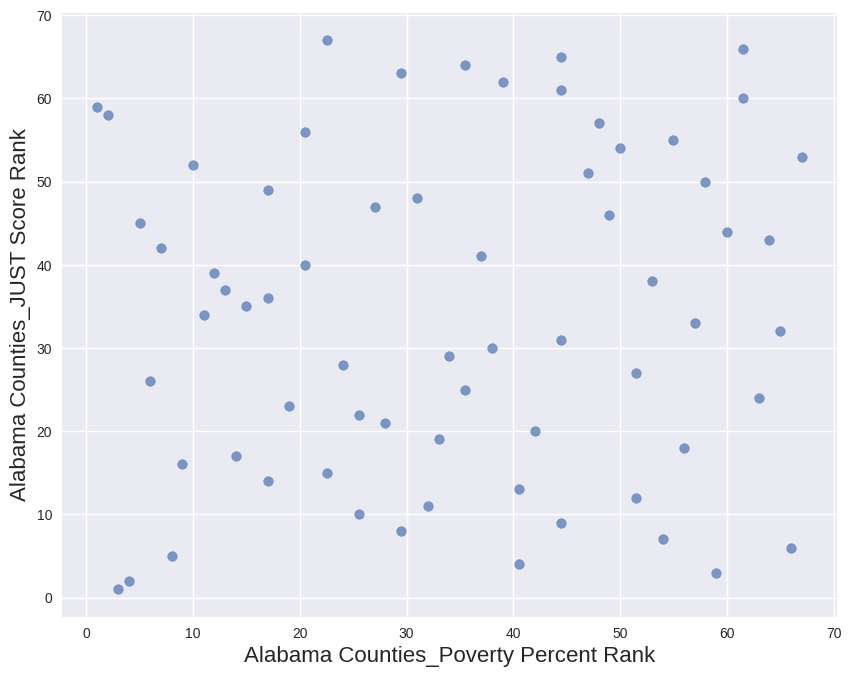

In [39]:
#Figure 7
AL_JUST_score_rank1=list(AL_Counties_H_OFS['Rank_weight'])

fig = plt.figure(facecolor='w')
plt.figure(figsize=(10,8), dpi=100)
x=list(AL_CENSUS['Poverty Percent, Rank'])
y=AL_JUST_score_rank1

plt.scatter(x, y, alpha=0.7)    
plt.xlabel('Alabama Counties_Poverty Percent Rank', fontsize=16)
plt.ylabel('Alabama Counties_JUST Score Rank', fontsize=16)